In [0]:
import pandas as pd
df_train = pd.read_csv('train_values (2).csv')
df_train_labels = pd.read_csv('train_labels (2).csv')
df_test=pd.read_csv('test_values (1).csv')
df=df_train.append(df_test,ignore_index=True)



In [0]:

from sklearn.preprocessing import LabelEncoder
lnc = LabelEncoder()

#df_train['land_surface_condition'] =lnc.fit_transform(df_train['land_surface_condition'])
#df_train['foundation_type']= lnc.fit_transform(df_train['foundation_type'])
#df_train['roof_type']= lnc.fit_transform(df_train['roof_type'])
#df_train['ground_floor_type']= lnc.fit_transform(df_train['ground_floor_type'])
#df_train['other_floor_type']= lnc.fit_transform(df_train['other_floor_type'])
#df_train['position']= lnc.fit_transform(df_train['position'])
#df_train['plan_configuration']= lnc.fit_transform(df_train['plan_configuration'])
#df_train['legal_ownership_status']= lnc.fit_transform(df_train['legal_ownership_status'])
print(df.info())

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


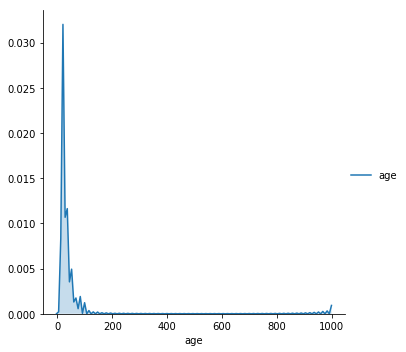

In [0]:
import numpy as np
#df['age'].replace(0,np.nan,inplace=True)
import seaborn as sns
(sns
  .FacetGrid(df,size=5)
  .map(sns.kdeplot, 'age', shade=True)
 .add_legend()
)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


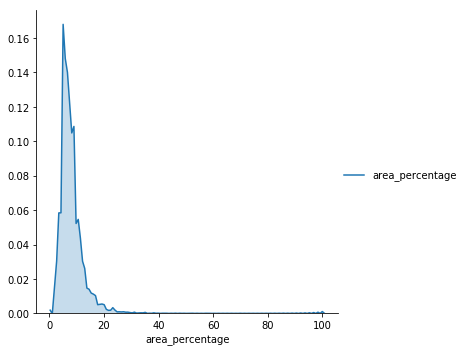

In [0]:
#df['age'].fillna(df['age'].median(),inplace=True)
(sns
  .FacetGrid(df,size=5)
  .map(sns.kdeplot, 'area_percentage', shade=True)
 .add_legend()
)

In [0]:
import numpy as np
df['age'] = np.log(df['age'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [0]:
df['area_percentage']=np.log(df['area_percentage'])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347469 entries, 0 to 347468
Data columns (total 39 columns):
building_id                               347469 non-null int64
geo_level_1_id                            347469 non-null int64
geo_level_2_id                            347469 non-null int64
geo_level_3_id                            347469 non-null int64
count_floors_pre_eq                       347469 non-null int64
age                                       347469 non-null int64
area_percentage                           347469 non-null float64
height_percentage                         347469 non-null int64
land_surface_condition                    347469 non-null object
foundation_type                           347469 non-null object
roof_type                                 347469 non-null object
ground_floor_type                         347469 non-null object
other_floor_type                          347469 non-null object
position                                  347469 n

In [0]:
#df['count_families'].replace(0,np.nan,inplace=True)
#df['count_families'].fillna(df['count_families'].median(),inplace=True)

In [0]:
df['count_families'].value_counts()

1    301377
0     27937
2     15010
3      2415
4       547
5       135
6        33
7         8
9         4
8         3
Name: count_families, dtype: int64

In [0]:
df=df.join(df_train_labels,lsuffix='_caller', rsuffix='_other')

In [0]:
categorical_features = ['land_surface_condition', 'foundation_type', 'roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']

In [0]:
df['area_to_height_pct_ratio']=df['area_percentage']/df['height_percentage']

In [0]:
df['area_to_height_pct_ratio'].describe()

count    347469.000000
mean          0.402824
std           0.170337
min           0.000000
25%           0.297063
50%           0.358352
75%           0.460517
max           2.171903
Name: area_to_height_pct_ratio, dtype: float64

In [0]:
a = df.groupby(['geo_level_1_id'])['count_floors_pre_eq'].agg('median')
df = pd.merge(df, a.reset_index(), suffixes=["", "_ByGeoLevelId1Floor"], how='left', on=['geo_level_1_id'])



In [0]:
df.corr()['damage_grade']

building_id_caller                        0.001063
geo_level_1_id                           -0.072347
geo_level_2_id                            0.043161
geo_level_3_id                            0.007932
count_floors_pre_eq                       0.122308
age                                       0.029273
area_percentage                          -0.125221
height_percentage                         0.048130
has_superstructure_adobe_mud              0.055314
has_superstructure_mud_mortar_stone       0.291325
has_superstructure_stone_flag             0.066039
has_superstructure_cement_mortar_stone   -0.060295
has_superstructure_mud_mortar_brick       0.014561
has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_timber                -0.069852
has_superstructure_bamboo                -0.063051
has_superstructure_rc_non_engineered     -0.158145
has_superstructure_rc_engineered         -0.179014
has_superstructure_other                 -0.030224
count_families                 

In [0]:
b = df.groupby(['geo_level_2_id'])['count_floors_pre_eq'].agg('median')
df = pd.merge(df, b.reset_index(), suffixes=["", "_ByGeoLevelId2Floor"], how='left', on=['geo_level_2_id'])


In [0]:
c = df.groupby(['geo_level_3_id'])['count_floors_pre_eq'].agg('median')
df = pd.merge(df, c.reset_index(), suffixes=["", "_ByGeoLevelId3Floor"], how='left', on=['geo_level_3_id']) 


In [0]:
d = df.groupby(['geo_level_1_id'])['age'].agg('median')
df = pd.merge(df, d.reset_index(), suffixes=["", "_ByAgeGeoLevelId1Age"], how='left', on=['geo_level_1_id']) 



In [0]:
e = df.groupby(['geo_level_2_id'])['age'].agg('median')
df = pd.merge(df, e.reset_index(), suffixes=["", "_ByAgeGeoLevelId2Age"], how='left', on=['geo_level_2_id'])

In [0]:
f = df.groupby(['geo_level_3_id'])['age'].agg('median')
df = pd.merge(df, f.reset_index(), suffixes=["", "_ByAgeGeoLevelId3Age"], how='left', on=['geo_level_3_id']) 

In [0]:
 g = df.groupby(['geo_level_1_id'])['area_percentage'].agg('median')
 df = pd.merge(df, g.reset_index(), suffixes=["", "_ByGeoLevelId1Area_Percentage"], how='left', on=['geo_level_1_id'])


In [0]:
h = df.groupby(['geo_level_2_id'])['area_percentage'].agg('median')
df = pd.merge(df, h.reset_index(), suffixes=["", "_ByAgeGeoLevelId2Area_Percentage"], how='left', on=['geo_level_2_id'])

In [0]:
i = df.groupby(['geo_level_3_id'])['area_percentage'].agg('median')
df = pd.merge(df, i.reset_index(), suffixes=["", "_ByAgeGeoLevelId3Area_Percentage"], how='left', on=['geo_level_3_id'])

In [0]:
j = df.groupby(['geo_level_1_id'])['height_percentage'].agg('median')
df = pd.merge(df, j.reset_index(), suffixes=["", "_ByAgeGeoLevelId1Height_Percentage"], how='left', on=['geo_level_1_id'])


In [0]:
k = df.groupby(['geo_level_2_id'])['height_percentage'].agg('median')
df = pd.merge(df, k.reset_index(), suffixes=["", "_ByAgeGeoLevelId2Height_Percentage"], how='left', on=['geo_level_2_id'])

In [0]:
l = df.groupby(['geo_level_3_id'])['height_percentage'].agg('median')
df = pd.merge(df, l.reset_index(), suffixes=["", "_ByAgeGeoLevelId3Height_Percentage"], how='left', on=['geo_level_3_id'])

In [0]:
df.drop(['building_id_other'],axis=1,inplace=True)

In [0]:
df.corr()['damage_grade']

building_id_caller                                     0.001063
geo_level_1_id                                        -0.072347
geo_level_2_id                                         0.043161
geo_level_3_id                                         0.007932
count_floors_pre_eq                                    0.122308
age                                                    0.029273
area_percentage                                       -0.109324
height_percentage                                      0.048130
has_superstructure_adobe_mud                           0.055314
has_superstructure_mud_mortar_stone                    0.291325
has_superstructure_stone_flag                          0.066039
has_superstructure_cement_mortar_stone                -0.060295
has_superstructure_mud_mortar_brick                    0.014561
has_superstructure_cement_mortar_brick                -0.254131
has_superstructure_timber                             -0.069852
has_superstructure_bamboo               

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

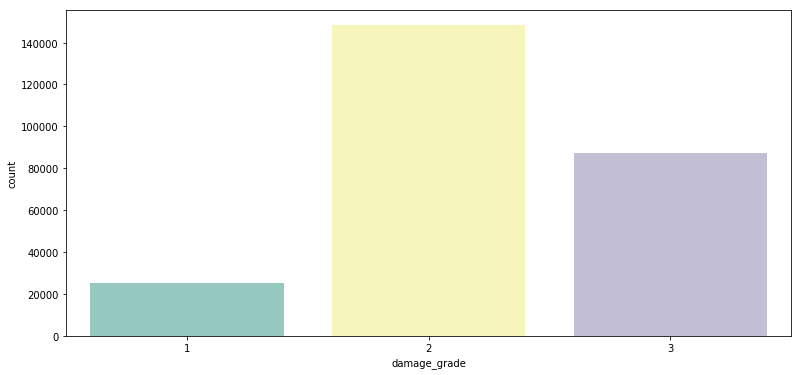

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,6))
sns.countplot(df_train.damage_grade, palette = 'Set3')
df_train.damage_grade.value_counts()

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 41 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null float64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null int64
foundation_type                           260601 non-null int64
roof_type                                 260601 non-null int64
ground_floor_type                         260601 non-null int64
other_floor_type                          260601 non-null int64
position                                  260601 non-nu

In [0]:
#df_train.drop('building_id_other',inplace=True,axis=1)
df.rename(columns={'building_id_caller':'building_id'},inplace=True)


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347469 entries, 0 to 347468
Data columns (total 53 columns):
building_id                                            347469 non-null int64
geo_level_1_id                                         347469 non-null int64
geo_level_2_id                                         347469 non-null int64
geo_level_3_id                                         347469 non-null int64
count_floors_pre_eq                                    347469 non-null int64
age                                                    347469 non-null int64
area_percentage                                        347469 non-null float64
height_percentage                                      347469 non-null int64
land_surface_condition                                 347469 non-null object
foundation_type                                        347469 non-null object
roof_type                                              347469 non-null object
ground_floor_type                    

In [0]:
dftrain=df[df['damage_grade'].isnull()!=True]
dftest=df[df['damage_grade'].isnull()==True]
dftrain.head()
def convert(x):
  if x==1:
    x=0
    return 0
  elif x==2:
    x=1
    return 1
  elif x==3:
    x=2
    return x
dftrain['damage_grade']=dftrain['damage_grade'].apply(lambda x : convert(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
dftrain['damage_grade'].describe()

count    260601.000000
mean          1.238272
std           0.611814
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: damage_grade, dtype: float64

In [0]:
import numpy as np
X,y=dftrain.drop(['damage_grade'],axis=1),dftrain['damage_grade']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1994)

In [0]:
#dftrain.info()
print(y_train.describe())

count    182420.000000
mean          1.237973
std           0.612315
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: damage_grade, dtype: float64


In [0]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]

In [0]:
pip install catboost

     |████████████████████████████████| 60.6MB 1.4MB/s 


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
c_clf=CatBoostClassifier(n_estimators=1000,random_state=1994,eval_metric='TotalF1',max_depth=8,learning_rate=0.1,od_wait=50
                     ,l2_leaf_reg=5,cat_features=categorical_features_indices,bagging_temperature=0.85,random_strength=100,
                     use_best_model=True,rsm=0.6,loss_function='MultiClass',classes_count=3,one_hot_max_size=10)
c_clf.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=150,verbose=100)

0:	learn: 0.4129390	test: 0.4129390	test1: 0.4149562	best: 0.4149562 (0)	total: 412ms	remaining: 6m 51s
100:	learn: 0.6459410	test: 0.6459410	test1: 0.6434051	best: 0.6434051 (100)	total: 35.5s	remaining: 5m 15s
200:	learn: 0.6950791	test: 0.6950791	test1: 0.6900884	best: 0.6900884 (200)	total: 1m 11s	remaining: 4m 45s
300:	learn: 0.7225543	test: 0.7225543	test1: 0.7110636	best: 0.7110636 (300)	total: 1m 48s	remaining: 4m 11s
400:	learn: 0.7343258	test: 0.7343258	test1: 0.7201320	best: 0.7201320 (400)	total: 2m 24s	remaining: 3m 35s
500:	learn: 0.7426732	test: 0.7426732	test1: 0.7250120	best: 0.7250120 (500)	total: 3m 1s	remaining: 3m
600:	learn: 0.7491023	test: 0.7491023	test1: 0.7272259	best: 0.7272259 (600)	total: 3m 37s	remaining: 2m 24s
700:	learn: 0.7552455	test: 0.7552455	test1: 0.7297335	best: 0.7298514 (698)	total: 4m 14s	remaining: 1m 48s
800:	learn: 0.7606935	test: 0.7606935	test1: 0.7312377	best: 0.7314079 (795)	total: 4m 50s	remaining: 1m 12s
900:	learn: 0.7653556	test: 0.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
c_clf=CatBoostClassifier(n_estimators=1000,random_state=1994,eval_metric='TotalF1',max_depth=10,learning_rate=0.1
                     ,l2_leaf_reg=5,cat_features=categorical_features_indices,bagging_temperature=0.85,random_strength=120,
                     use_best_model=True,loss_function='MultiClass',classes_count=3,one_hot_max_size=10,rsm=0.6,od_type='iter')
c_clf.fit(X_train,y_train,eval_set=[(X_test, y_test)], early_stopping_rounds=150,verbose=100,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4307951	test: 0.4298303	best: 0.4298303 (0)	total: 408ms	remaining: 6m 47s
100:	learn: 0.6558856	test: 0.6522263	best: 0.6522263 (100)	total: 38.4s	remaining: 5m 41s
200:	learn: 0.7138183	test: 0.7008062	best: 0.7008062 (200)	total: 1m 19s	remaining: 5m 15s
300:	learn: 0.7441958	test: 0.7226620	best: 0.7227538 (299)	total: 2m 1s	remaining: 4m 41s
400:	learn: 0.7604961	test: 0.7293017	best: 0.7293017 (400)	total: 2m 43s	remaining: 4m 3s
500:	learn: 0.7720353	test: 0.7332322	best: 0.7332322 (500)	total: 3m 25s	remaining: 3m 24s
600:	learn: 0.7823250	test: 0.7352644	best: 0.7354232 (593)	total: 4m 7s	remaining: 2m 44s
700:	learn: 0.7914666	test: 0.7365201	best: 0.7365201 (700)	total: 4m 50s	remaining: 2m 4s
800:	learn: 0.8007456	test: 0.7373618	best: 0.7373629 (797)	total: 5m 34s	remaining: 1m 23s
900:	learn: 0.8095416	test: 0.7376882	best: 0.7377482 (834)	total: 6m 18s	remaining: 41.6s
999:	learn: 0.8176834	test: 0.7387347	best: 0.7388135 (990)	total: 7m 3s	remaining: 0us

be

In [0]:
from sklearn.metrics import f1_score
y_pred=c_clf.predict(X_test)
print(f1_score(y_test,y_pred,average='micro'))

0.7446438392959926


In [0]:
df_fp=pd.DataFrame(data=c_clf.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [0]:
df_fp

,importance
geo_level_1_id,11.260256
geo_level_2_id,8.254355
height_percentage_ByAgeGeoLevelId1Height_Percentage,5.765989
geo_level_3_id,5.755985
age,4.695768
area_percentage_ByAgeGeoLevelId2Area_Percentage,4.505526
area_percentage_ByAgeGeoLevelId3Area_Percentage,4.451993
age_ByAgeGeoLevelId1Age,4.084454
age_ByAgeGeoLevelId2Age,3.864743
building_id,3.586064


In [0]:
pred = c_clf.predict(dftest,prediction_type='Class')
pred1= pd.DataFrame(data=pred)

In [0]:
pred1.columns=['damage_grade']
def c(x):
  if x==0:
    return 1
  elif x==1:
    return 2
  elif x==2:
    return 3
pred1['damage_grade']=pred1['damage_grade'].apply(lambda x : x+1)
pred1.describe()

,damage_grade
count,86868.000000
mean,2.208235
std,0.553702
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [0]:
df_pred1 = df_test[['building_id']]


result_df = pd.concat([df_pred1,pred1], axis=1, join_axes=[df_pred1.index])
result_df['damage_grade']=result_df['damage_grade'].astype('int')

print(result_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 2 columns):
building_id     86868 non-null int64
damage_grade    86868 non-null int64
dtypes: int64(2)
memory usage: 1.3 MB
None


In [0]:
result_df.describe()

,building_id,damage_grade
count,8.686800e+04,86868.000000
mean,5.266279e+05,2.210515
std,3.037828e+05,0.553610
min,7.000000e+00,1.000000
25%,2.644215e+05,2.000000
50%,5.269835e+05,2.000000
75%,7.890842e+05,3.000000
max,1.052923e+06,3.000000


In [0]:
result_df.to_csv('submission.csv',index=False)

2    219196
4     15118
3     14260
1     10579
0      1448
Name: foundation_type, dtype: int64

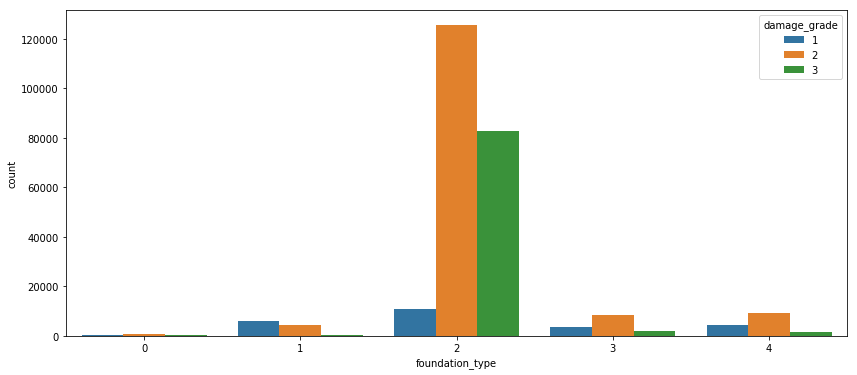

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='foundation_type',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['foundation_type'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

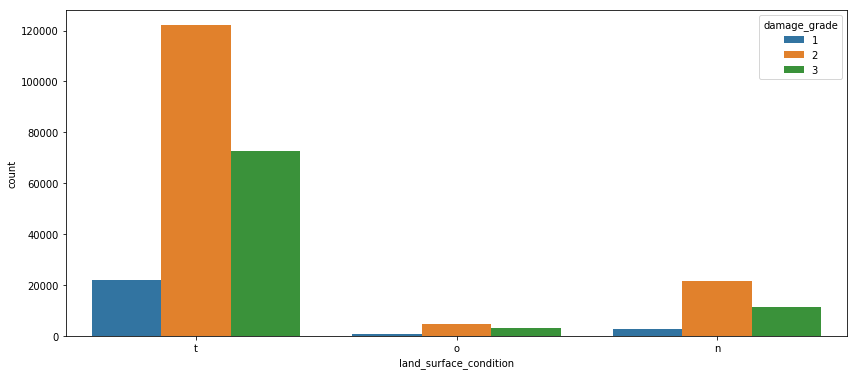

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='land_surface_condition',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['land_surface_condition'].value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

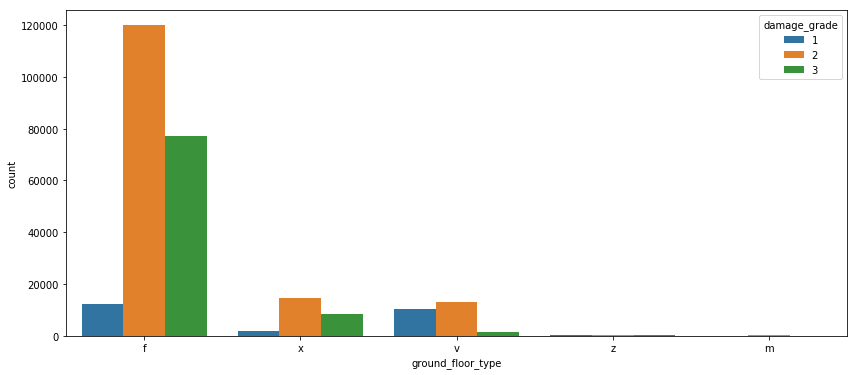

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='ground_floor_type',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['ground_floor_type'].value_counts()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


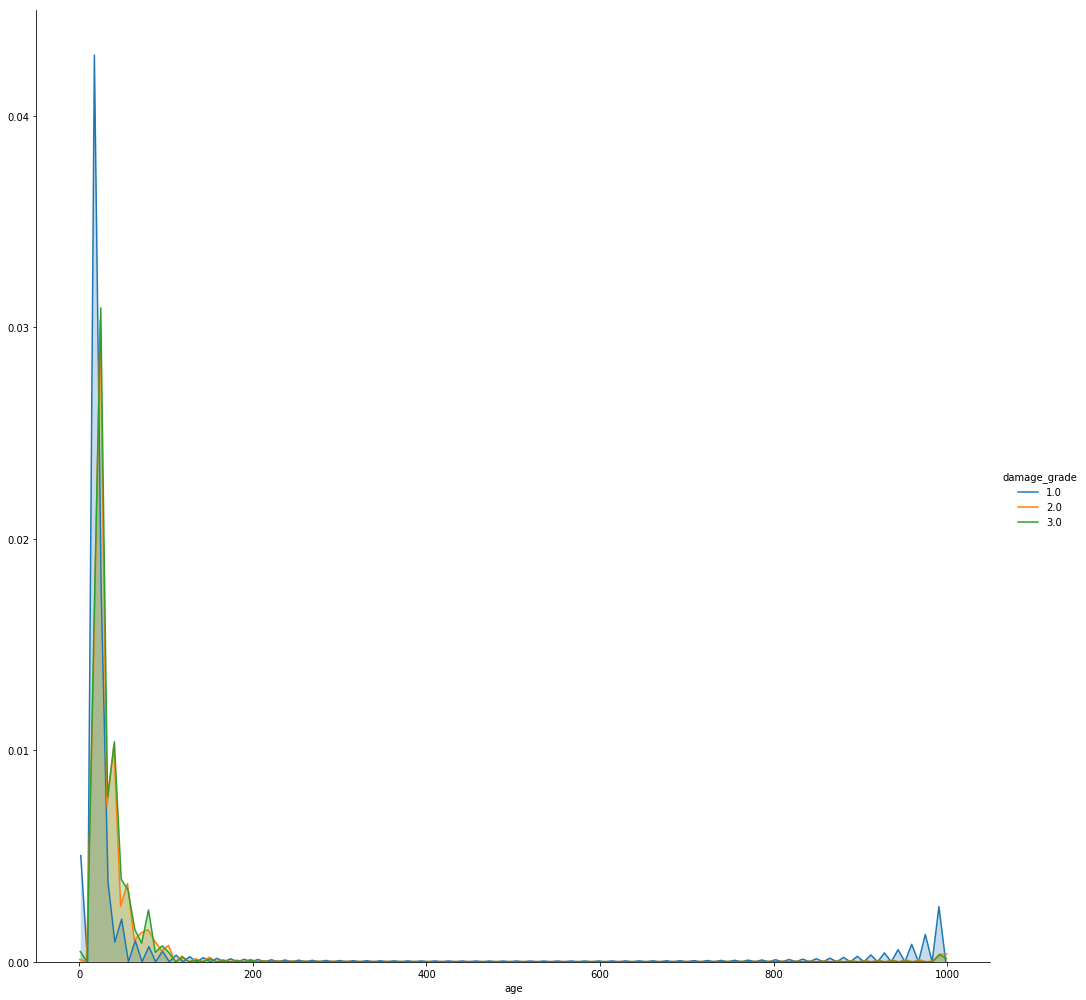

In [0]:
import seaborn as sns
(sns
  .FacetGrid(df, 
             hue='damage_grade',size=14)
  .map(sns.kdeplot, 'age', shade=True)
 .add_legend()
)

In [0]:
df_train['age'].value_counts()

20.0     58223
10.0     38896
15.0     36010
5.0      33697
25.0     24366
30.0     18028
35.0     10710
40.0     10559
50.0      7257
45.0      4711
60.0      3612
80.0      3055
55.0      2033
70.0      1975
995.0     1390
100.0     1364
65.0      1123
90.0      1085
85.0       847
75.0       512
95.0       414
120.0      180
150.0      142
200.0      106
110.0      100
105.0       89
125.0       37
115.0       21
130.0        9
140.0        9
180.0        7
170.0        6
160.0        6
135.0        5
175.0        5
145.0        3
190.0        3
195.0        2
165.0        2
185.0        1
155.0        1
Name: age, dtype: int64

In [0]:
df_train['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id_caller                        260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

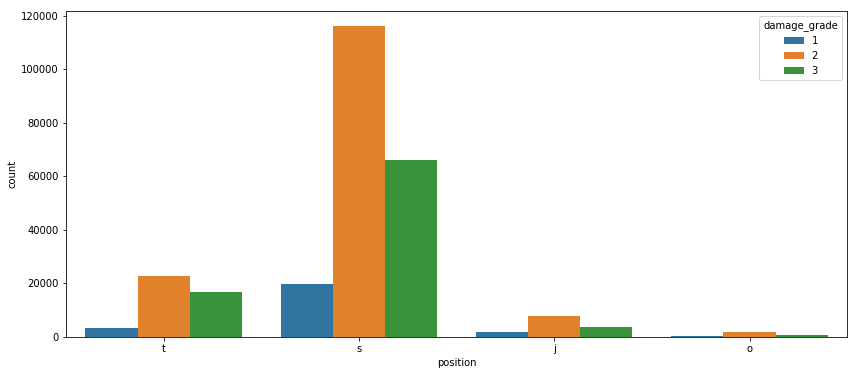

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='position',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['position'].value_counts()

In [0]:
df_train.count_floors_pre_eq.value_counts

<bound method IndexOpsMixin.value_counts of 0         2
1         2
2         2
3         2
4         3
5         2
6         2
7         2
8         2
9         1
10        2
11        1
12        2
13        3
14        2
15        2
16        2
17        3
18        1
19        2
20        3
21        2
22        2
23        3
24        2
25        2
26        3
27        2
28        2
29        3
         ..
260571    2
260572    2
260573    2
260574    1
260575    2
260576    3
260577    2
260578    3
260579    2
260580    2
260581    2
260582    1
260583    2
260584    2
260585    2
260586    2
260587    3
260588    3
260589    3
260590    2
260591    1
260592    2
260593    2
260594    6
260595    2
260596    1
260597    2
260598    3
260599    2
260600    3
Name: count_floors_pre_eq, Length: 260601, dtype: int64>

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


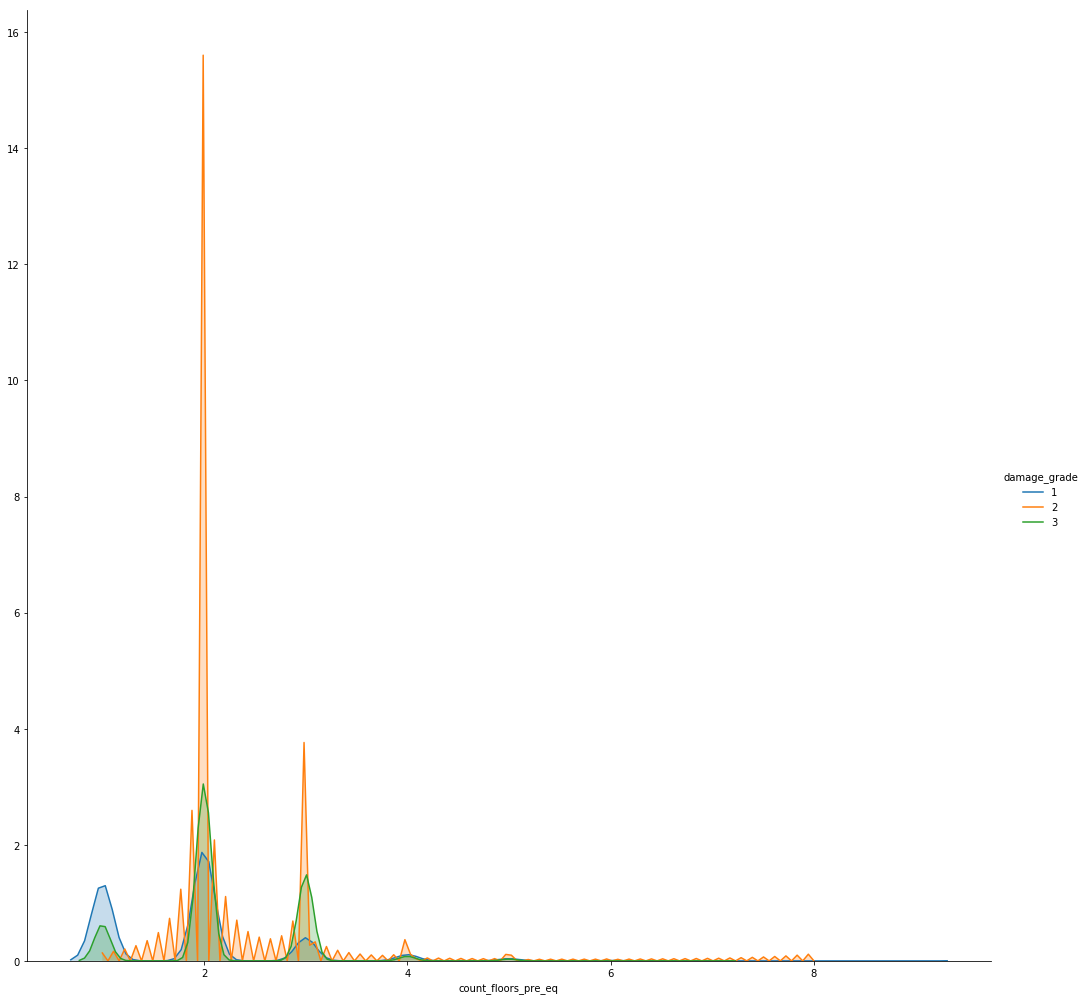

In [0]:
(sns
  .FacetGrid(df_train, 
             hue='damage_grade',size=14)
  .map(sns.kdeplot, 'count_floors_pre_eq', shade=True)
 .add_legend()
)

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

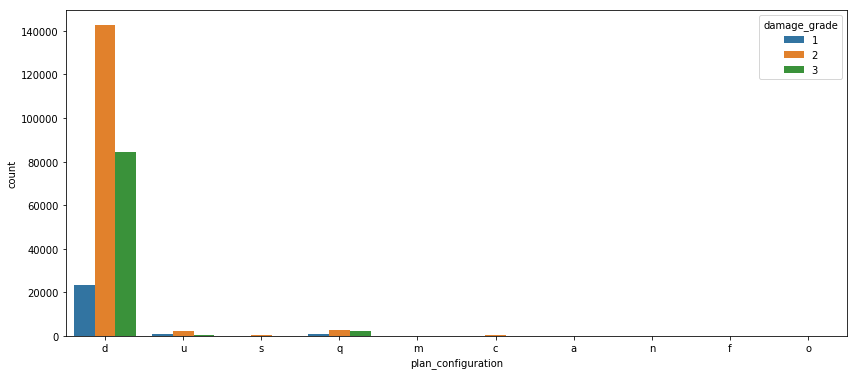

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='plan_configuration',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['plan_configuration'].value_counts()

In [0]:
df_train.area_percentage.value_counts()

6      42013
7      36752
5      32724
8      28445
9      22199
4      19236
10     15613
11     13907
3      11837
12      7581
13      5815
14      4162
15      3489
2       3181
16      2606
17      2489
19      1602
18      1317
20      1053
23       865
21       645
24       405
22       391
25       260
26       247
27       240
29       197
28       167
31       144
35       104
       ...  
54         8
77         8
67         8
53         7
56         7
70         7
72         6
65         5
86         5
85         4
61         4
64         4
59         4
63         4
83         3
62         3
73         3
96         3
51         3
84         3
69         2
60         2
76         2
90         1
55         1
82         1
80         1
78         1
75         1
100        1
Name: area_percentage, Length: 84, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


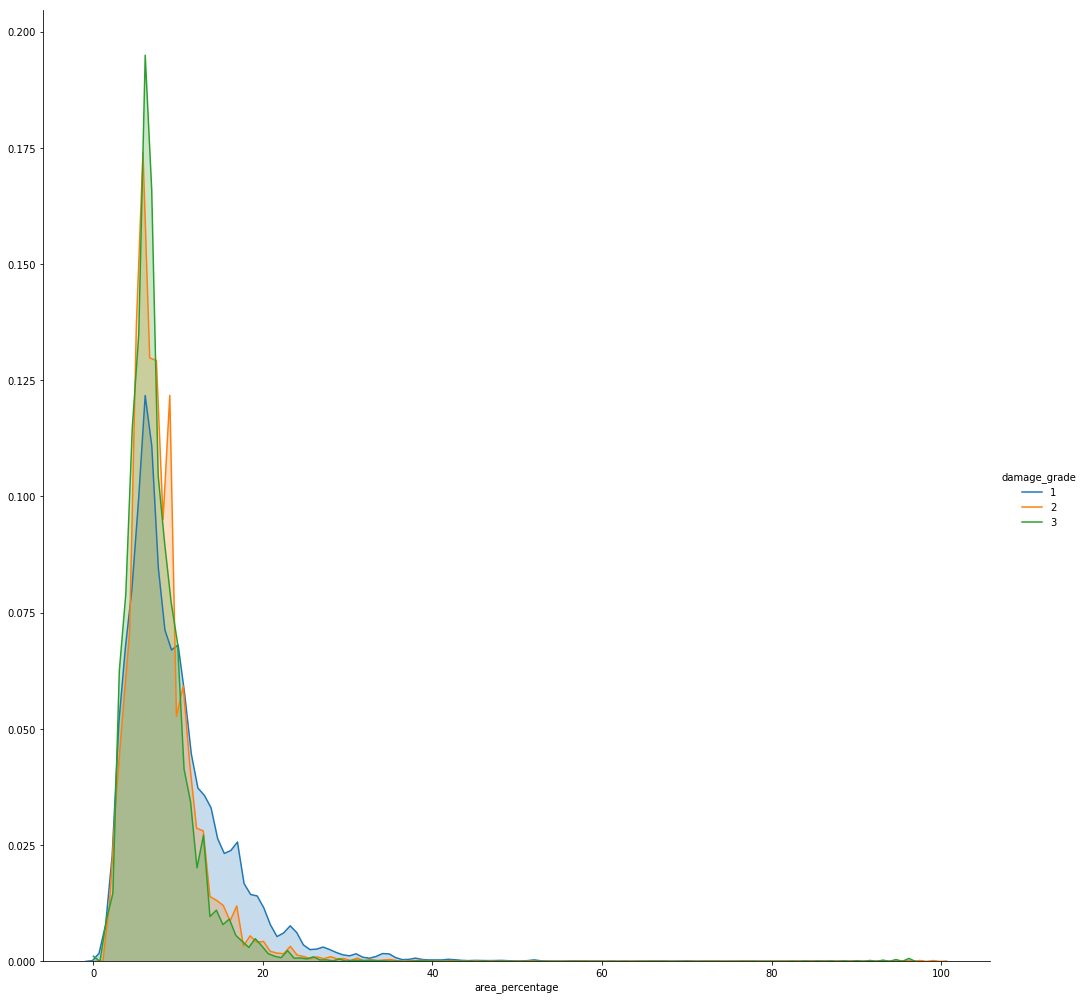

In [0]:
(sns
  .FacetGrid(df_train, 
             hue='damage_grade',size=14)
  .map(sns.kdeplot, 'area_percentage', shade=True)
 .add_legend()
)

0    237500
1     23101
Name: has_superstructure_adobe_mud, dtype: int64

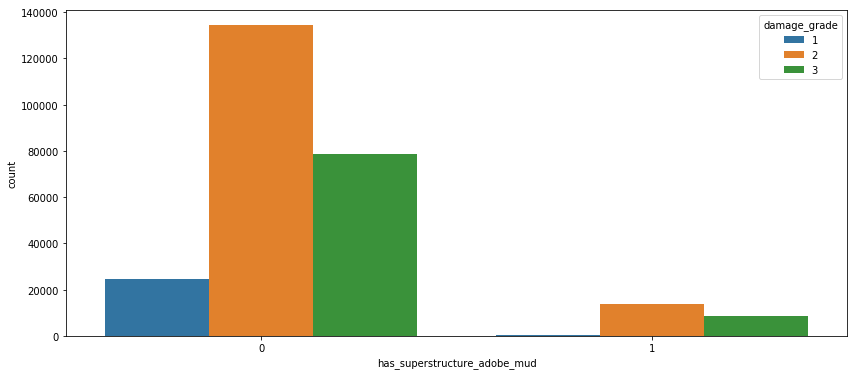

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='has_superstructure_adobe_mud',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['has_superstructure_adobe_mud'].value_counts()

1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

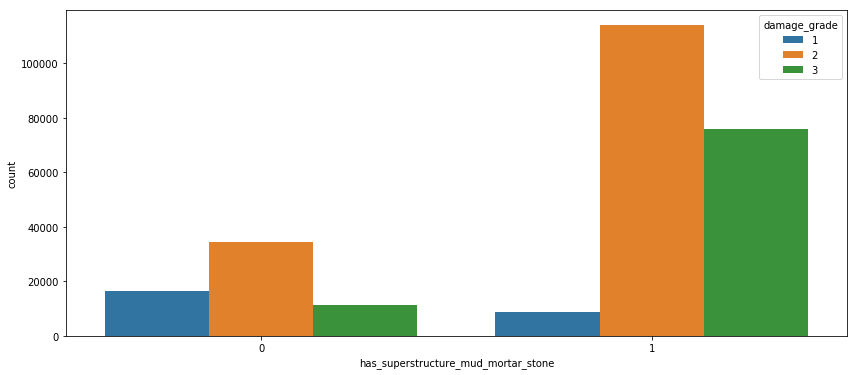

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='has_superstructure_mud_mortar_stone',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['has_superstructure_mud_mortar_stone'].value_counts()

0    251654
1      8947
Name: has_superstructure_stone_flag, dtype: int64

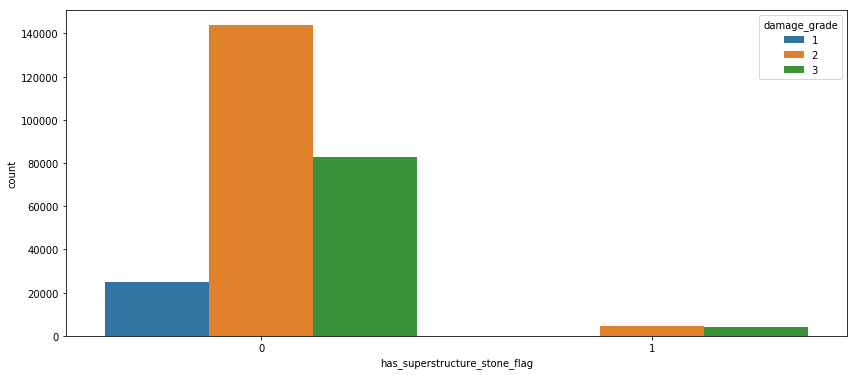

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='has_superstructure_stone_flag',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['has_superstructure_stone_flag'].value_counts()

0    255849
1      4752
Name: has_superstructure_cement_mortar_stone, dtype: int64

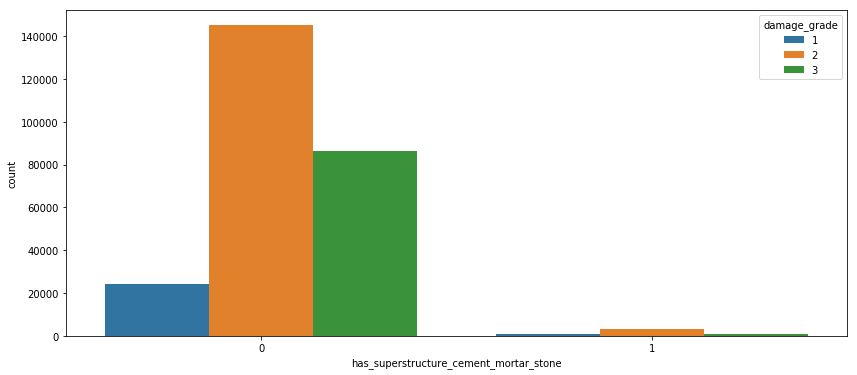

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='has_superstructure_cement_mortar_stone',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['has_superstructure_cement_mortar_stone'].value_counts()

0    242840
1     17761
Name: has_superstructure_mud_mortar_brick, dtype: int64

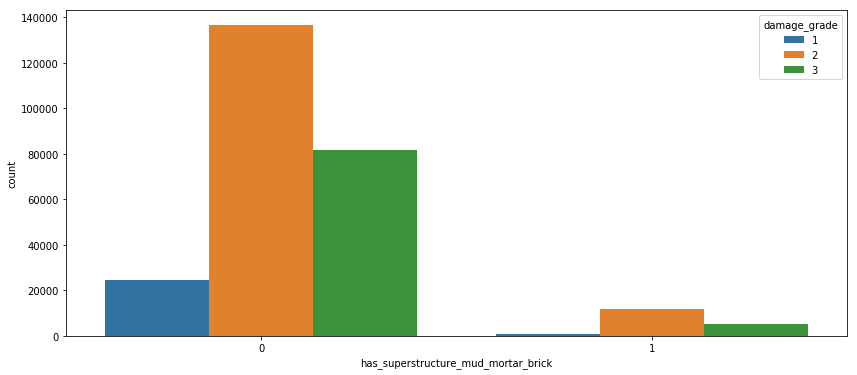

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='has_superstructure_mud_mortar_brick',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['has_superstructure_mud_mortar_brick'].value_counts()

0    240986
1     19615
Name: has_superstructure_cement_mortar_brick, dtype: int64

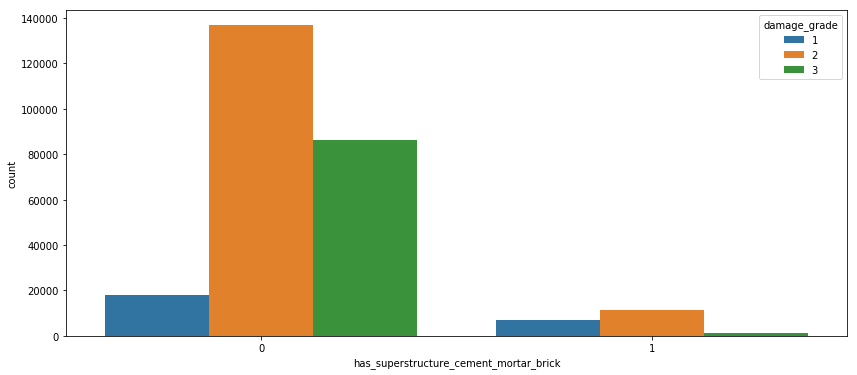

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='has_superstructure_cement_mortar_brick',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['has_superstructure_cement_mortar_brick'].value_counts()

0    194151
1     66450
Name: has_superstructure_timber, dtype: int64

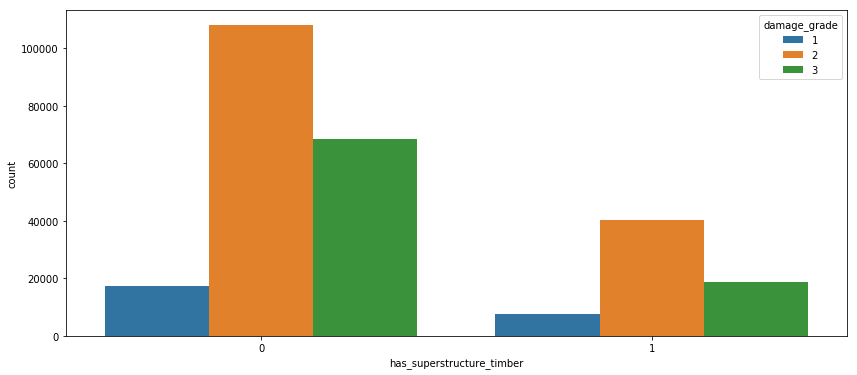

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='has_superstructure_timber',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['has_superstructure_timber'].value_counts()

0    238447
1     22154
Name: has_superstructure_bamboo, dtype: int64

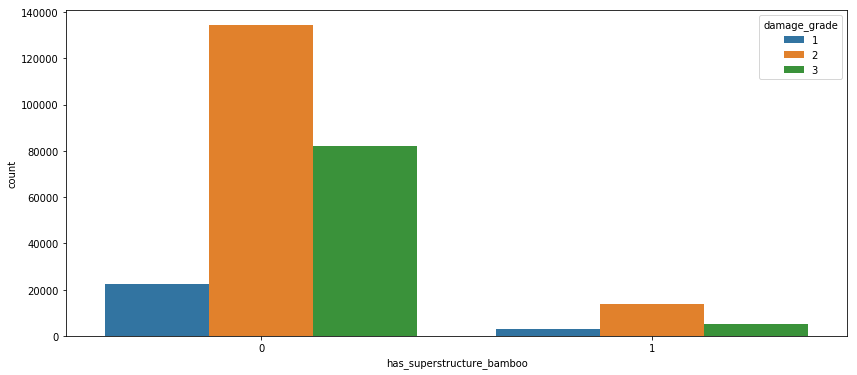

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='has_superstructure_bamboo',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['has_superstructure_bamboo'].value_counts()

0    249502
1     11099
Name: has_superstructure_rc_non_engineered, dtype: int64

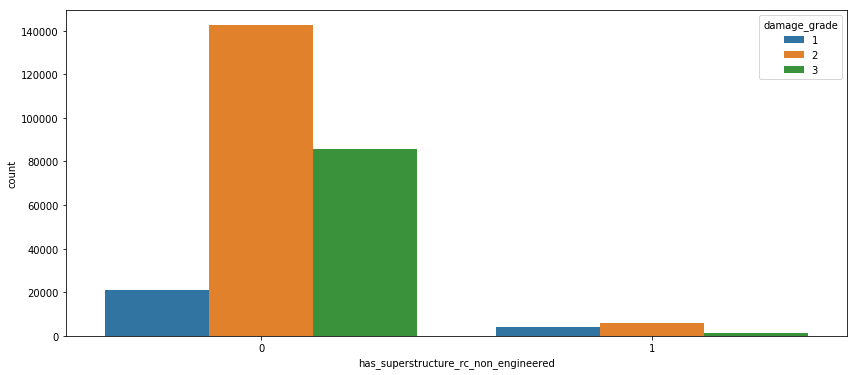

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='has_superstructure_rc_non_engineered',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['has_superstructure_rc_non_engineered'].value_counts()

0    256468
1      4133
Name: has_superstructure_rc_engineered, dtype: int64

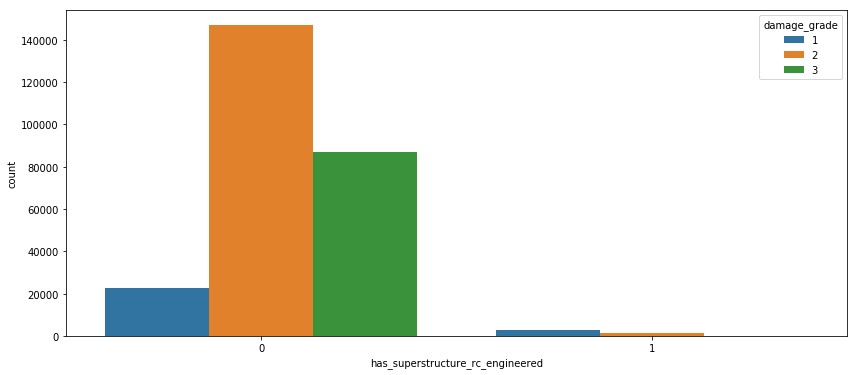

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='has_superstructure_rc_engineered',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['has_superstructure_rc_engineered'].value_counts()

0    256696
1      3905
Name: has_superstructure_other, dtype: int64

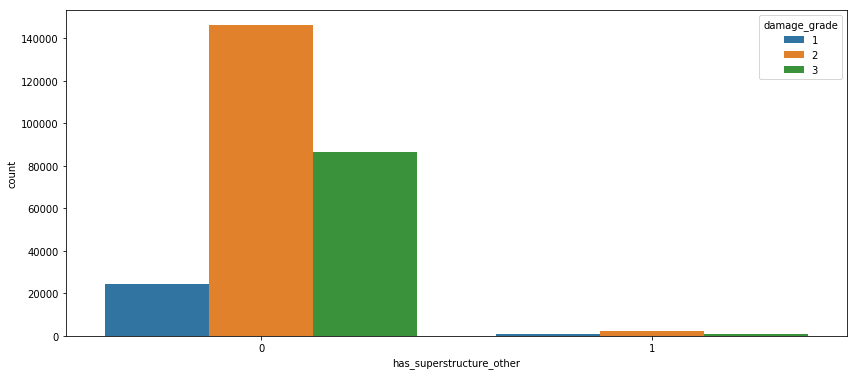

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='has_superstructure_other',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['has_superstructure_other'].value_counts()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


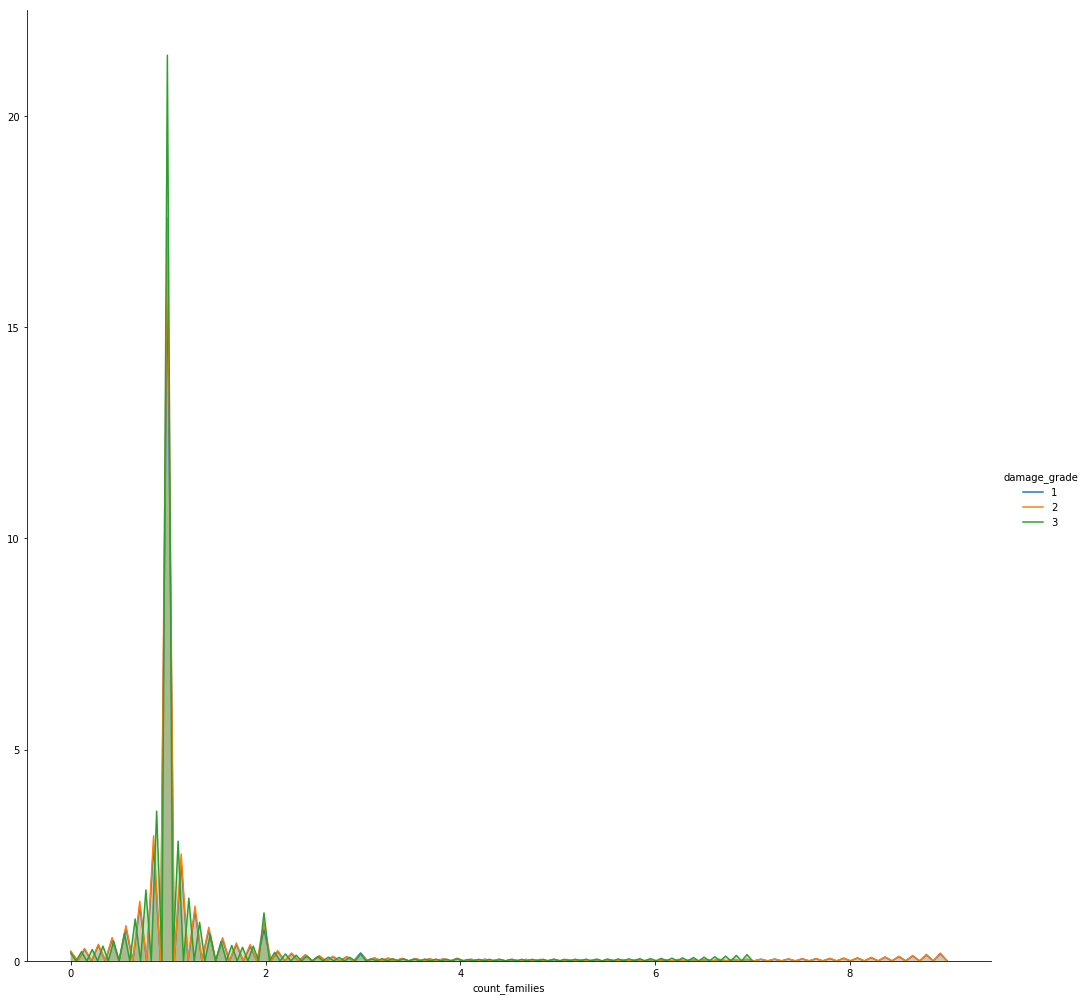

In [0]:
(sns
  .FacetGrid(df_train, 
             hue='damage_grade',size=14)
  .map(sns.kdeplot, 'count_families', shade=True)
 .add_legend()
)

0    231445
1     29156
Name: has_secondary_use, dtype: int64

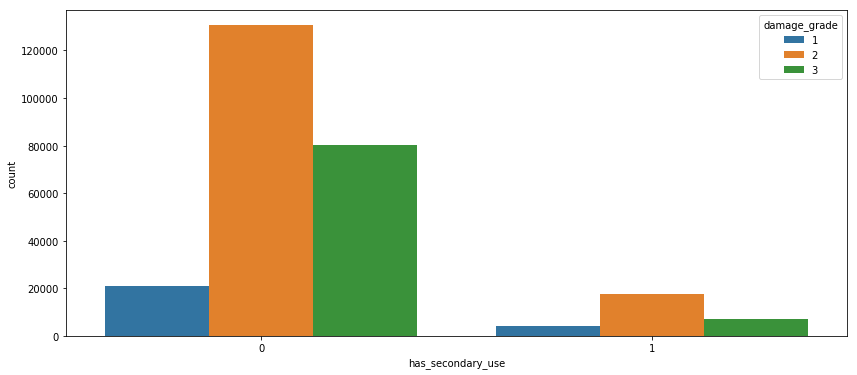

In [0]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_train,x='has_secondary_use',hue='damage_grade')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
df_train['has_secondary_use'].value_counts()

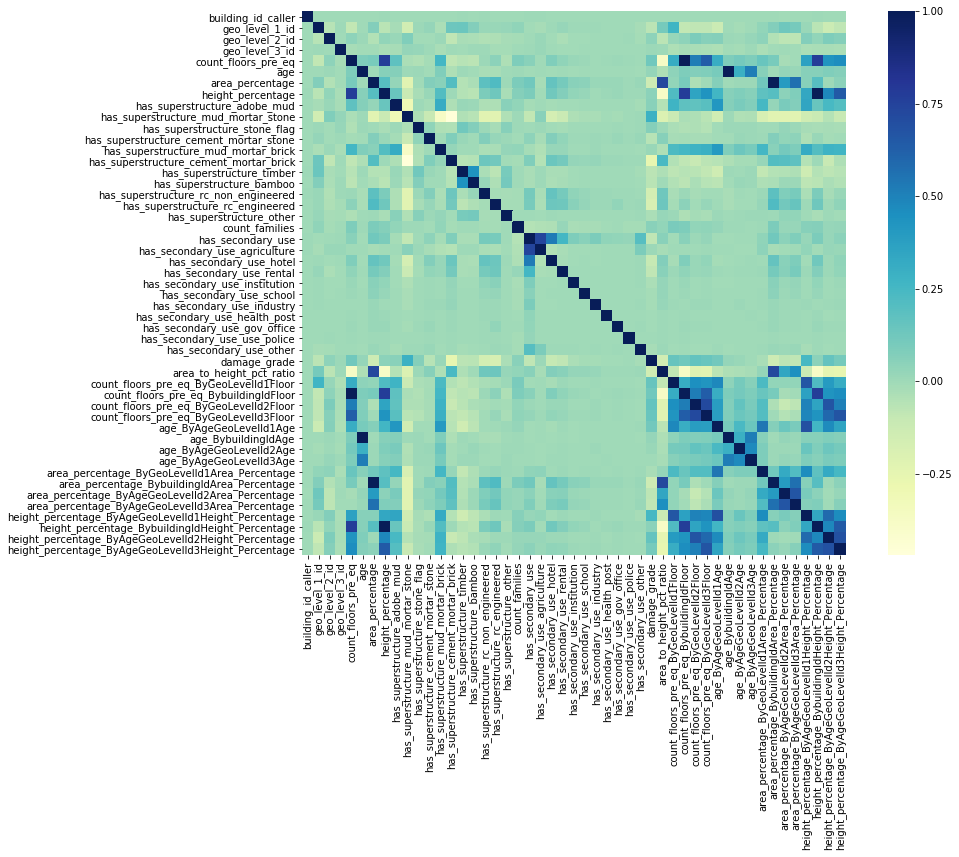

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),square=True,cmap='YlGnBu')

In [0]:
df_train.corr()['damage_grade']

building_id                               0.001063
geo_level_1_id                           -0.072347
geo_level_2_id                            0.043161
geo_level_3_id                            0.007932
count_floors_pre_eq                       0.122308
age                                       0.016917
area_percentage                          -0.125221
height_percentage                         0.048130
land_surface_condition                   -0.012218
foundation_type                          -0.100601
roof_type                                -0.173890
ground_floor_type                        -0.180397
other_floor_type                          0.037038
position                                  0.055202
plan_configuration                       -0.042369
has_superstructure_adobe_mud              0.055314
has_superstructure_mud_mortar_stone       0.291325
has_superstructure_stone_flag             0.066039
has_superstructure_cement_mortar_stone   -0.060295
has_superstructure_mud_mortar_b

In [0]:
df_train3 = pd.read_csv('xgbranker.csv')
print(df_train3['damage_grade'].value_counts())

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


In [0]:
s=[25124,87218,148259]
X= df_train3.drop(['damage_grade'],axis=1)
y = df_train3['damage_grade']
from xgboost.sklearn import XGBRanker

from sklearn.model_selection import GridSearchCV,train_test_split



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30,stratify=y)

xg_rk=XGBRanker(objective='rank:pairwise',learning_rate=0.1,max_depth=8,colsample_bytree=0.6,n_estimators=1000,subsample=0.8,seed=132,n_jobs=-1,gamma=0.05,min_child_weight=5)
xg_rk.fit(X_train,y_train,s)

In [0]:

X= df_train.drop(['damage_grade','building_id_other'],axis=1)
y = df_train['damage_grade']
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import GridSearchCV,train_test_split



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30,stratify=y)

xg_clf=XGBClassifier(objective='multi:softmax',learning_rate=0.1,max_depth=8,colsample_bytree=0.6,n_estimators=1000,subsample=0.8,seed=132,n_jobs=-1,num_class=3,gamma=0.05,min_child_weight=5)
xg_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.05, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=5, missing=None,
       n_estimators=1000, n_jobs=-1, nthread=None, num_class=3,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=132, silent=True,
       subsample=0.8)

In [0]:
from sklearn.metrics import f1_score
y_pred = xg_clf.predict(X_test)
print(f1_score(y_test,y_pred,average='micro'))


0.7421752088103247


In [0]:
feature_importances = pd.DataFrame(xg_rk.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)  

In [0]:
df_train1 = df_train.groupby(['damage_grade'])

In [0]:
#df_train1.sort_values(by='damage_grade',ascending=True)
df_train2=df_train1.apply(lambda df: df.sort_values(by=['damage_grade']))

In [0]:
df_train2.head()

building_id  geo_level_1_id  geo_level_2_id  \
damage_grade                                                       
1            7            475515              20             323   
             173486       127115              10            1074   
             173485       197108              17            1030   
             173480       377175              26              39   
             173471       904461              27             533   

                     geo_level_3_id  count_floors_pre_eq   age  \
damage_grade                                                     
1            7                12236                    2  20.0   
             173486            8048                    1  10.0   
             173485             606                    4  20.0   
             173480            1324                    2   5.0   
             173471           11882                    2  10.0   

                     area_percentage  height_percentage  \
damage_grade                                              
1            7                     8                  6   
             173486               12                  3   
             173485               25                 16   
             173480               14                  6   
             173471               17                  6   

                     land_surface_condition  foundation_type  ...  \
damage_grade                                                  ...   
1            7                            2                4  ...   
             173486                       2                2  ...   
             173485                       2                1  ...   
             173480                       2                1  ...   
             173471                       2                1  ...   

                     has_secondary_use_rental  has_secondary_use_institution  \
damage_grade                                                                   
1            7                              0                              0   
             173486                         0                              0   
             173485                         0                              0   
             173480                         0                              0   
             173471                         0                              0   

                     has_secondary_use_school  has_secondary_use_industry  \
damage_grade                                                                
1            7                              0                           0   
             173486                         0                           0   
             173485                         0                           0   
             173480                         0                           0   
             173471                         0                           0   

                     has_secondary_use_health_post  \
damage_grade                                         
1            7                                   0   
             173486                              0   
             173485                              0   
             173480                              0   
             173471                              0   

                     has_secondary_use_gov_office  \
damage_grade                                        
1            7                                  0   
             173486                             0   
             173485                             0   
             173480                             0   
             173471                             0   

                     has_secondary_use_use_police  has_secondary_use_other  \
damage_grade                                                                 
1            7                                  0                        0   
             173486                             0                        0   
             173485

In [0]:
df=pd.DataFrame(data=df_train2)
df.to_csv('xgbranker.csv')

In [0]:
df_test = pd.read_csv('test_values (1).csv')
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
building_id                               86868 non-null int64
geo_level_1_id                            86868 non-null int64
geo_level_2_id                            86868 non-null int64
geo_level_3_id                            86868 non-null int64
count_floors_pre_eq                       86868 non-null int64
age                                       86868 non-null int64
area_percentage                           86868 non-null int64
height_percentage                         86868 non-null int64
land_surface_condition                    86868 non-null object
foundation_type                           86868 non-null object
roof_type                                 86868 non-null object
ground_floor_type                         86868 non-null object
other_floor_type                          86868 non-null object
position                                  86868 non-null object
pla

In [0]:
df_test['land_surface_condition'] =lnc.fit_transform(df_test['land_surface_condition'])
df_test['foundation_type']= lnc.fit_transform(df_test['foundation_type'])
df_test['roof_type']= lnc.fit_transform(df_test['roof_type'])
df_test['ground_floor_type']= lnc.fit_transform(df_test['ground_floor_type'])
df_test['other_floor_type']= lnc.fit_transform(df_test['other_floor_type'])
df_test['position']= lnc.fit_transform(df_test['position'])
df_test['plan_configuration']= lnc.fit_transform(df_test['plan_configuration'])
df_test['legal_ownership_status']= lnc.fit_transform(df_test['legal_ownership_status'])

In [0]:
df_test['age'].replace(0,np.nan,inplace=True)
df_test['age'].fillna(df_test['age'].median(),inplace=True)


In [0]:
df_test['count_families'].replace(0,np.nan,inplace=True)
df_test['count_families'].fillna(df_test['count_families'].median(),inplace=True)

In [0]:
#df_test['building_id_caller'] = df_test['building_id']
#df_test.drop(['building_id'],inplace=True,axis=1)
#df_test.rename(columns={'building_id':'building_id_caller'},inplace=True)
pred = xg_rk.predict(df_test)
#df_train.info()

In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
building_id                               86868 non-null int64
geo_level_1_id                            86868 non-null int64
geo_level_2_id                            86868 non-null int64
geo_level_3_id                            86868 non-null int64
count_floors_pre_eq                       86868 non-null int64
age                                       86868 non-null float64
area_percentage                           86868 non-null int64
height_percentage                         86868 non-null int64
land_surface_condition                    86868 non-null int64
foundation_type                           86868 non-null int64
roof_type                                 86868 non-null int64
ground_floor_type                         86868 non-null int64
other_floor_type                          86868 non-null int64
position                                  86868 non-null int64
plan_co

In [0]:
result1=pd.DataFrame(data=pred)
result1.columns=['damage_grade']
#df1 = pd.DataFrame(data=df_test,columns=['buliding_id'])
df1 = df_test['building_id']
result_df = pd.concat([df1, result1], axis=1, join_axes=[df1.index])
#result_df['damage_grade']=result_df['damage_grade'].astype('int')

result_df.to_csv('submission.csv',index=False)

In [0]:
X


,building_id_caller,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,2,2,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,1,2,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,2,2,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,2,2,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,2,2,...,0,0,0,0,0,0,0,0,0,0
5,333020,8,558,6089,2,10,9,5,2,2,...,1,0,0,0,0,0,0,0,0,0
6,728451,9,475,12066,2,25,3,4,0,2,...,0,0,0,0,0,0,0,0,0,0
7,475515,20,323,12236,2,0,8,6,2,4,...,0,0,0,0,0,0,0,0,0,0
8,441126,0,757,7219,2,15,8,6,2,2,...,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,2,1,...,0,0,0,0,0,0,0,0,0,0
